# Module 5: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Practice the skills needed for evaulating the validity of model assumptions.
2. Implement some basic methods of fixing model assumptions.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.
4. There are 40 points total in this assignment.

In [1]:
# This cell loads the necesary libraries for this assignment
library(testthat)
library(tidyverse)
library(ggplot2)

Error in get(genname, envir = envir) : object 'testthat_print' not found


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



## Problem 1: Beer Foam Height

We've learned a lot over the last few weeks, and it's time to relax! We've headed down to the local pub, ordered some drinks: beer! But just as we are about to relax, [Ralphie](https://en.wikipedia.org/wiki/Ralphie_the_Buffalo) stops us and insists that we wait for her foam to disipate. I turns out that Ralphie does not like the foamy head of the beer, and won't let anyone drink until there is only $1$ centimeter of foam left. How long will we have to wait until we can drink? 

Data Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand," Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

In [2]:
# Load the data
beer.data = read.table("beer.dat", sep="")
names(beer.data) = c("time", "foam.height", "beer.height")
beer.data

time,foam.height,beer.height
<int>,<dbl>,<dbl>
0,17.40,0.60
15,15.10,2.20
30,13.10,3.40
45,11.60,4.15
60,10.60,4.50
90,8.70,5.10
120,7.40,5.50
150,6.35,5.80
180,5.40,5.90


#### 1. (a) Modelling (5 points)

Do not fret, statistics to the rescue! Thanks to a dataset loaded above, and provided by the University of Florida, we can model this exact scenario. Plot the relationship between `time` (in seconds) as the predictor and `foam.height` (in cm) as the response. Determine if a linear regression would be a good fit. If the data is not linear, try applying a transformation to the `foam.height` variable. Limit these transformations to the `exp()`, `log()`, `sqrt()` and `1/foam.height` functions. Save the most linear model into `beer.lmod`.

`geom_smooth()` using formula 'y ~ x'



time,foam.height,beer.height,logfoamheight
<int>,<dbl>,<dbl>,<dbl>
0,17.40,0.60,2.856470
15,15.10,2.20,2.714695
30,13.10,3.40,2.572612
45,11.60,4.15,2.451005
60,10.60,4.50,2.360854
90,8.70,5.10,2.163323
120,7.40,5.50,2.001480
150,6.35,5.80,1.848455
180,5.40,5.90,1.686399


`geom_smooth()` using formula 'y ~ x'



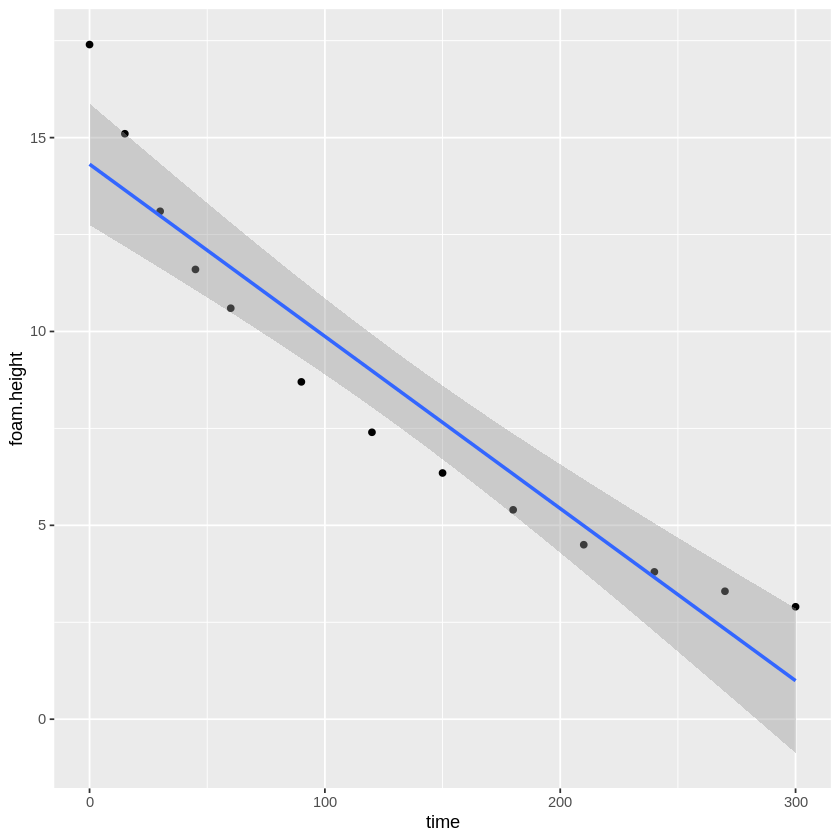


Call:
lm(formula = logfoamheight ~ time, data = beer.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06054 -0.03596 -0.01185  0.02247  0.10640 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.7500726  0.0239520  114.82  < 2e-16 ***
time        -0.0058467  0.0001462  -39.98 2.91e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05146 on 11 degrees of freedom
Multiple R-squared:  0.9932,	Adjusted R-squared:  0.9925 
F-statistic:  1599 on 1 and 11 DF,  p-value: 2.907e-13


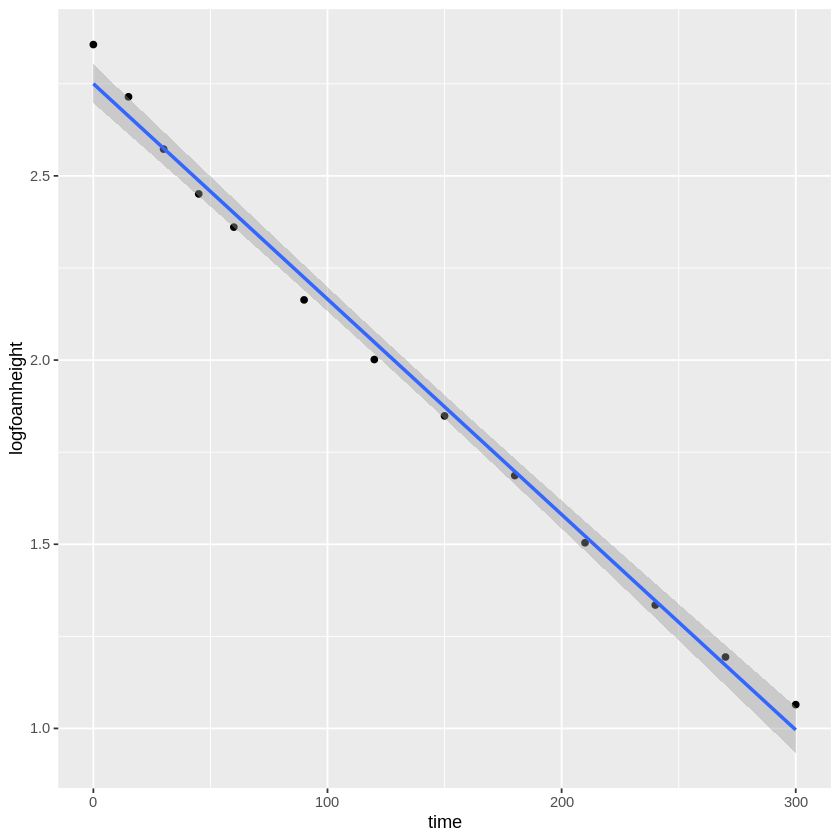

In [3]:
beer.lmod = NA

# your code here
ggplot(beer.data, aes(x = time, y = foam.height)) + 
    geom_point()+
    geom_smooth(method = lm, se = TRUE)

beer.data$logfoamheight = log(beer.data$foam.height)
beer.data

ggplot(beer.data, aes(x = time, y = logfoamheight)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

beer.lmod = lm(logfoamheight~time, data = beer.data)
summary(beer.lmod)

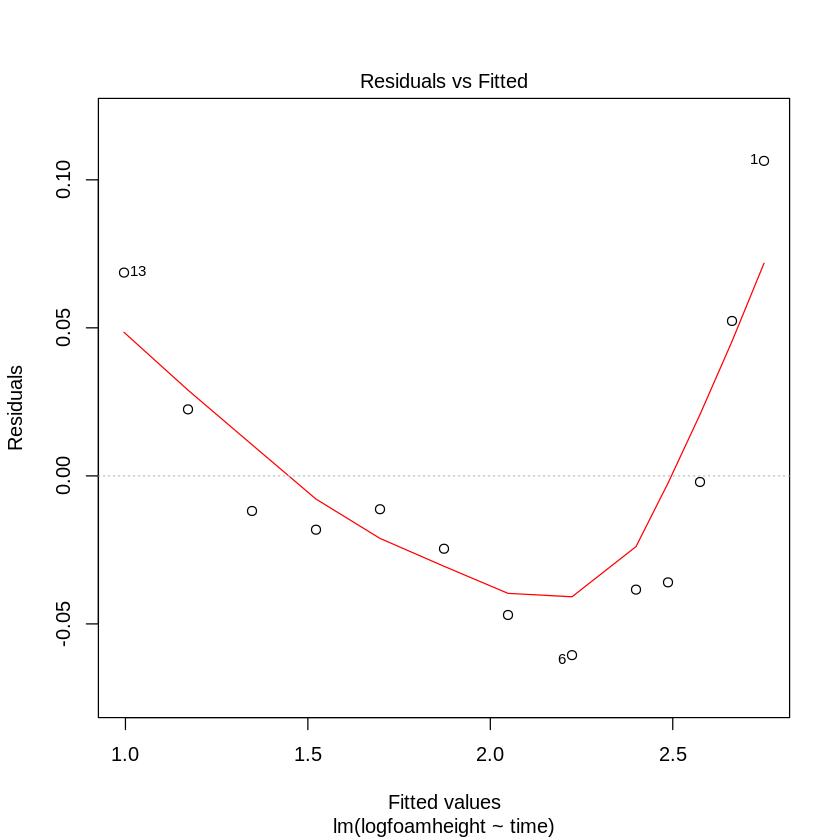

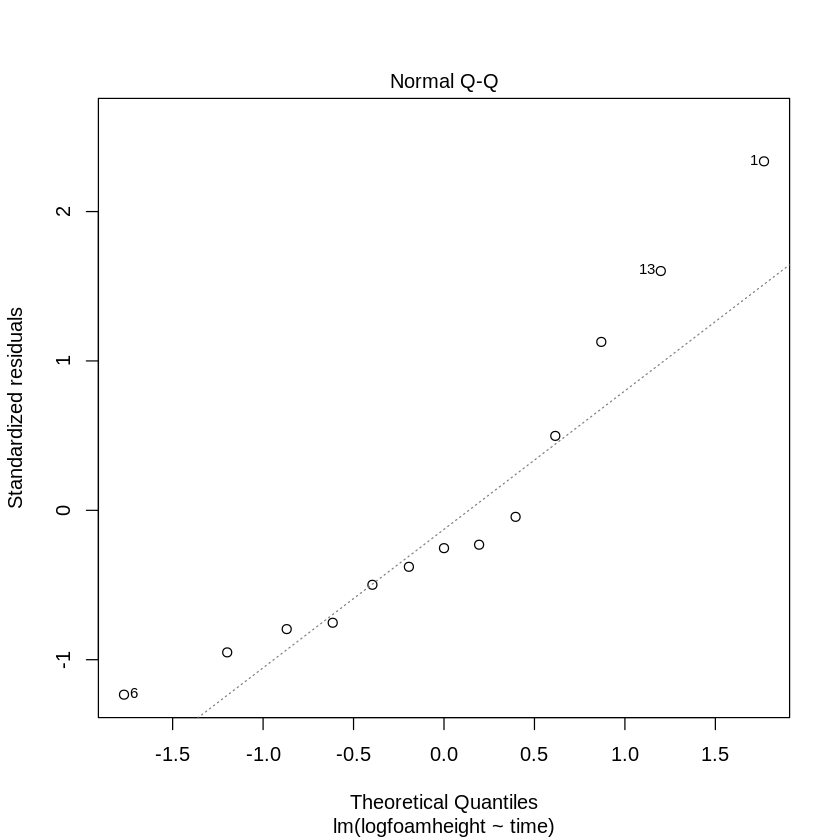

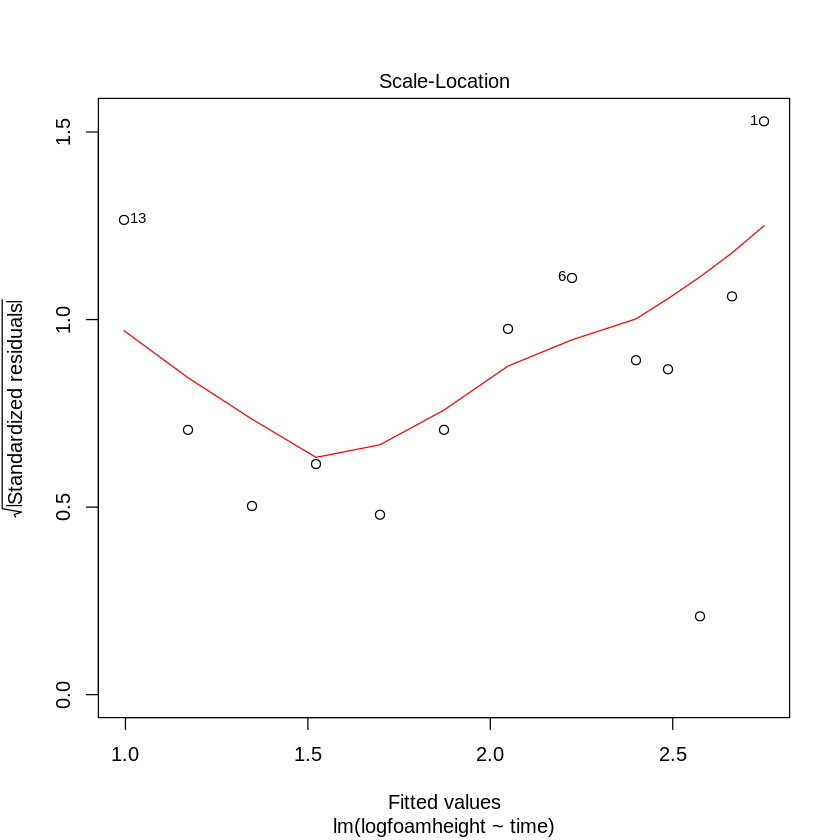

NULL

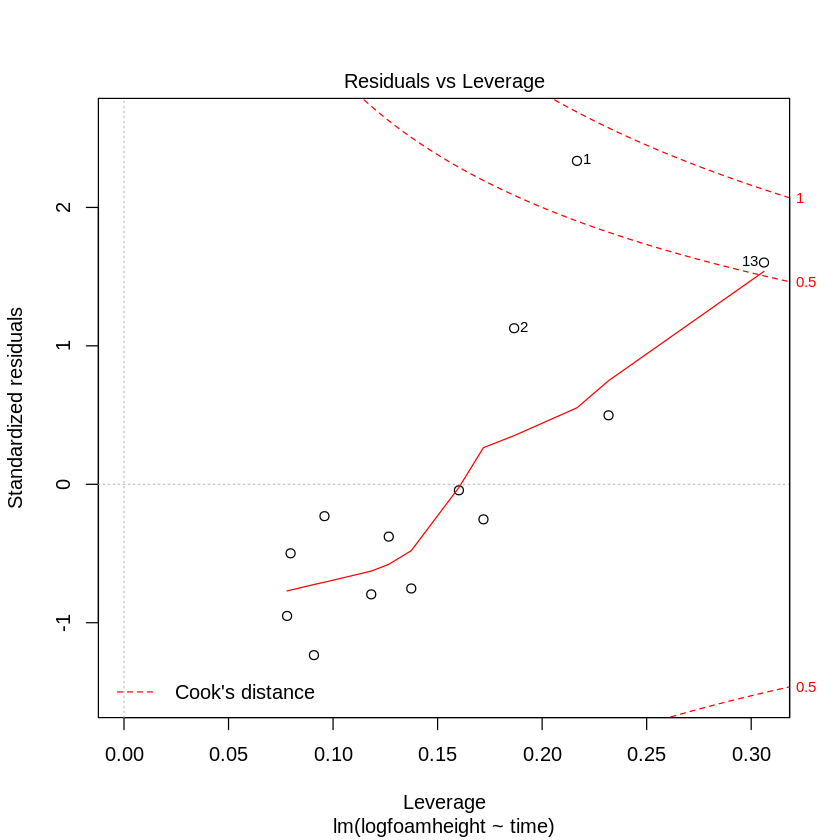

In [21]:
plot(beer.lmod)[1]

In [4]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 1. (b) Evaluation (5 points)

Using your final model, determine how long we will have to wait before Ralphie lets everyone drink their beers, i.e. how long it will take for there to be $1$ centimeter of foam. Save your final answer in `time.pred`. It may be helpful to explicitly write out the formula for your model.

In [5]:
#log(2.90)
#beer.lmod
summary(beer.lmod)


Call:
lm(formula = logfoamheight ~ time, data = beer.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06054 -0.03596 -0.01185  0.02247  0.10640 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.7500726  0.0239520  114.82  < 2e-16 ***
time        -0.0058467  0.0001462  -39.98 2.91e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05146 on 11 degrees of freedom
Multiple R-squared:  0.9932,	Adjusted R-squared:  0.9925 
F-statistic:  1599 on 1 and 11 DF,  p-value: 2.907e-13


In [6]:
foam.pred = 1
time.pred = NA

# your code here
#p <-  as.data.frame(foam.pred)
#FORMULA IS: Y = 2.7500726 -0.0058467 * X
#SOLVING FOR X IS: (Y - 2.75)/-.006

time.pred = (0 - beer.lmod[[1]][1])/beer.lmod[[1]][2]
#time.pred = (0-2.750073)/-0.005847
time.pred

(Intercept) 
   470.3593

In [7]:
# Test Cell
# This cell has hidden test cases that will run after submission.

## Problem 2: Assumptions Everywhere!

For the following, you will be given a dataset. Each of the following parts will require you to create figures and models to identify whether the specified assumption holds for that dataset. Do not perform any transformations on the data. Answer `TRUE` if the assumption holds and `FALSE` if the plot show the assumption being violated.

#### 2. (a) Assumption: Linearity (8 points)

In [8]:
# Load the data
data.a = read.csv("prob.2.a.csv", sep=",")
head(data.a)

,x1,x2,y
,<dbl>,<dbl>,<dbl>
1,0,-100.00000,0.000000
2,1,-99.21875,4.960667
3,2,-98.43750,2.178707
4,3,-97.65625,8.835020
5,4,-96.87500,13.937901
6,5,-96.09375,15.136433


In [9]:
prob.2.a = NA #assign as TRUE or FALSE

# your code here
prob.2.a = TRUE

In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 2. (b) Assumption: Homoskedasticity (8 points)

In [11]:
# Load the data
b.data = read.csv("prob.2.b.csv", sep=",")
head(b.data)

,x,y
,<dbl>,<dbl>
1,-10.0,58.55288
2,-9.8,70.94660
3,-9.6,-10.93033
4,-9.4,-45.34972
5,-9.2,60.58875
6,-9.0,-181.79560


In [12]:
prob.2.b = NA #assign as TRUE or FALSE

# your code here
prob.2.b = TRUE

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 2. (c) Assumption: Independent Errors (7 points)

Hint: Use the successive residual plot for this question. 

In [14]:
# Load the data
c.data = read.csv("prob.2.c.csv", sep=",")
head(c.data)

,x,y
,<int>,<dbl>
1,-50,-75.58532
2,-49,-41.14553
3,-48,-73.32356
4,-47,-72.03394
5,-46,-55.83278
6,-45,-15.12957


In [15]:
prob.2.c = NA # assign as TRUE or FALSE

# your code here
prob.2.c = TRUE

In [16]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 2. (d) Assumption: Normaly Distributed Errors (7 points)

In [17]:
# Load the data
d.data = read.csv("prob.2.d.csv", sep=",")
head(d.data)

,x,y
,<int>,<dbl>
1,0,2054.1832
2,50,-832.9480
3,100,706.7434
4,150,2811.1202
5,200,5723.2467
6,250,2384.0916


In [18]:
prob.2.d = NA #assign as TRUE or FALSE

# your code here
prob.2.d = FALSE

In [19]:
# Test Cell
# This cell has hidden test cases that will run after submission.